In [1]:
%%capture
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

In [2]:
import autosklearn.classification
import pandas as pd
from joblib import dump, load
import numpy as np
import glob
from alepython import ale_plot

/opt/conda/lib/python3.7/site-packages/pyparsing.py:3174: FutureWarning: Possible set intersection at position 3
  self.re = re.compile(self.reString)


In [3]:
models = []
for model_path in glob.glob("model_3cv/model_run_*"):
    models.append(load(model_path))

In [4]:
bad_models = []
for model_path in glob.glob("model_3cv/bad_auto_model_run_*"):
    bad_models.append(load(model_path))

In [5]:
numeric_conv_cols = ['age', 'age_o', 'importance_same_race', 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',\
                    'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', \
                    'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', \
                    'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important', \
                    'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner', 'sincere_partner', \
                     'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 'sports', \
                     'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', \
                     'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', \
                    'expected_num_interested_in_me', 'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'gender']

In [6]:
df = pd.read_csv("speeddating_reduced.csv")
X= df[numeric_conv_cols].fillna(-1)
y= df['match']

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


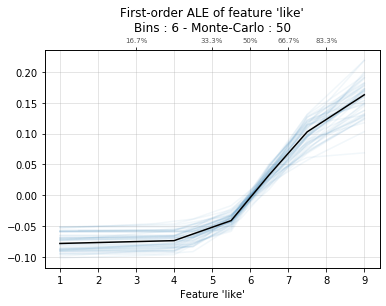

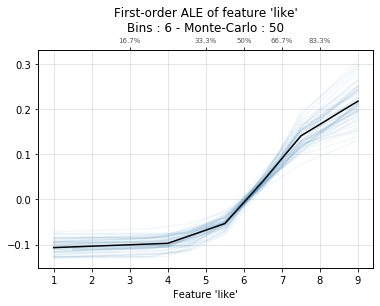

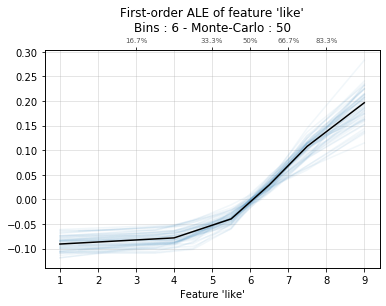

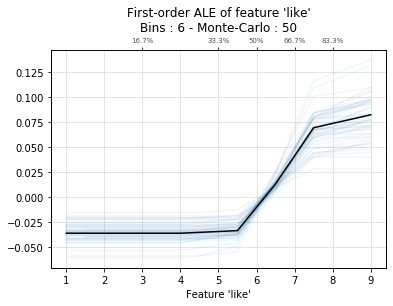

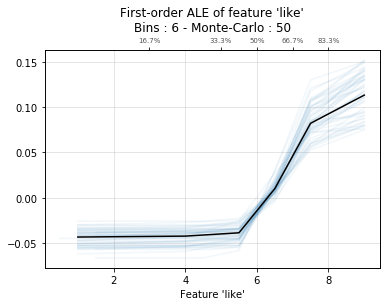

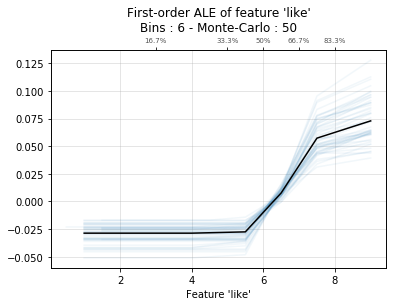

In [7]:
for model in models+bad_models:
    ale_plot(model, X, 'like', monte_carlo=True)

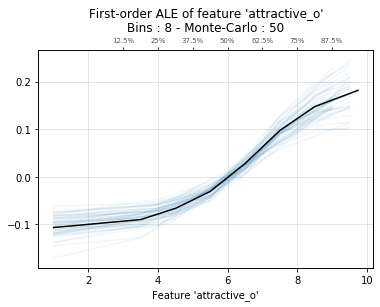

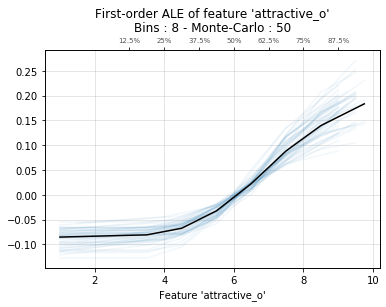

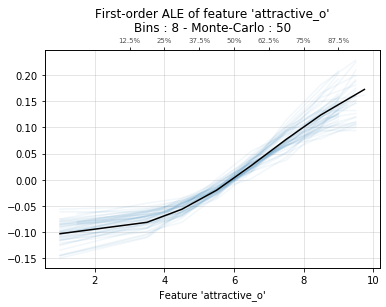

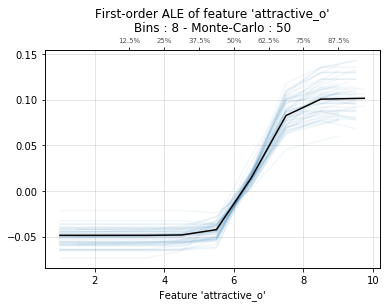

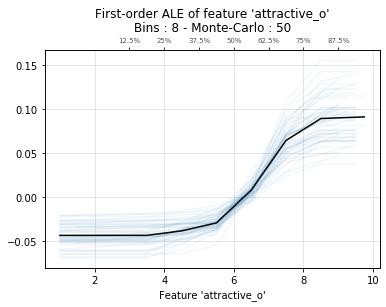

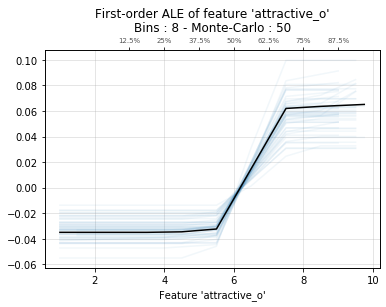

In [8]:
for model in models+bad_models:
    ale_plot(model, X, 'attractive_o', monte_carlo=True)

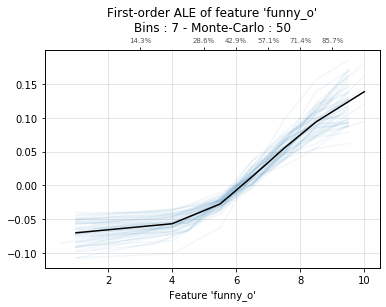

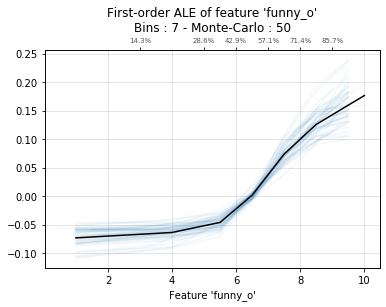

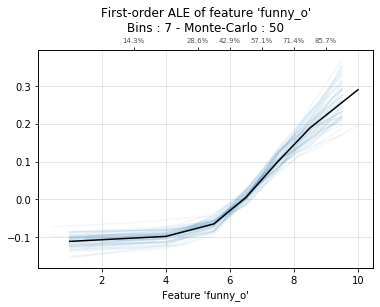

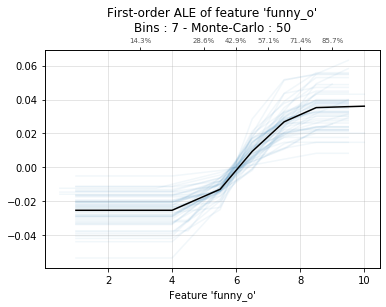

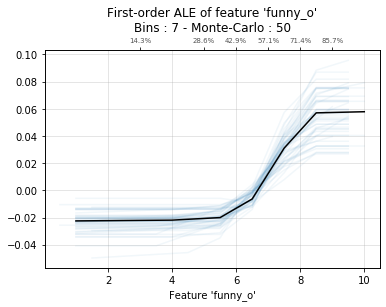

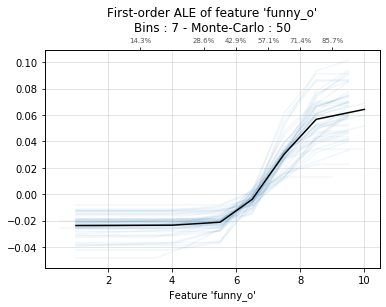

In [9]:
for model in models+bad_models:
    ale_plot(model, X, 'funny_o', monte_carlo=True)

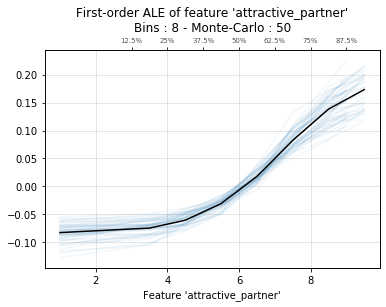

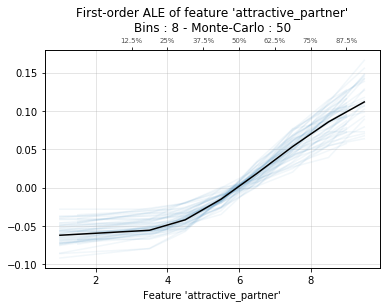

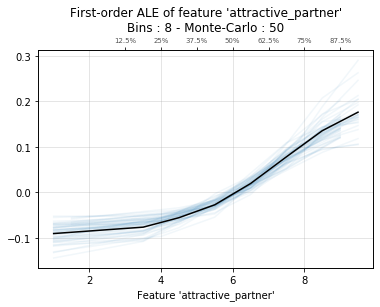

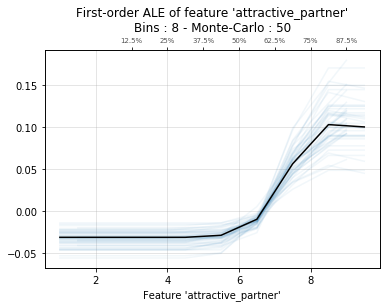

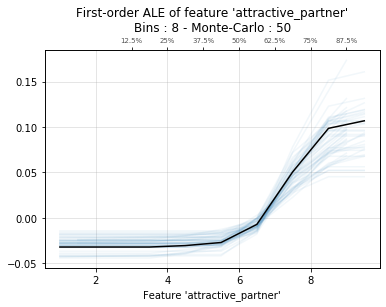

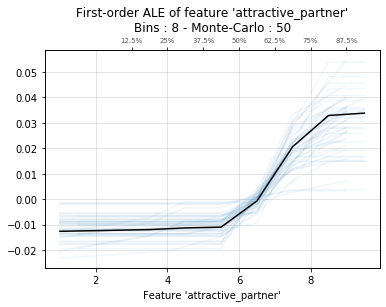

In [10]:
for model in models+bad_models:
    ale_plot(model, X, 'attractive_partner', monte_carlo=True)

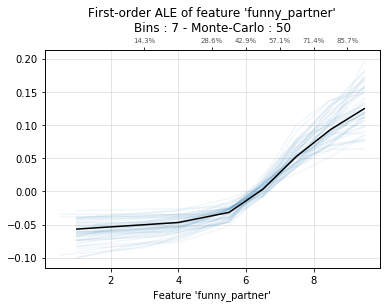

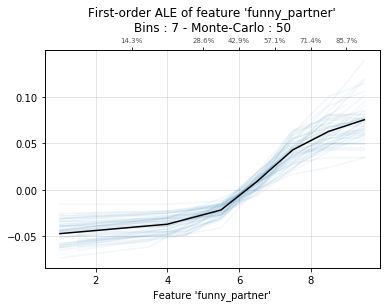

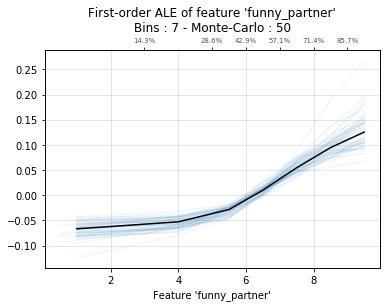

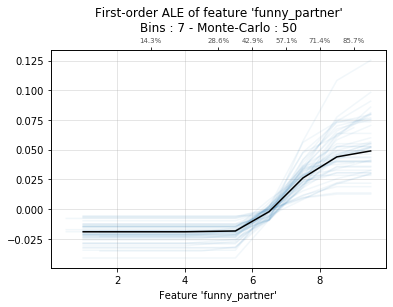

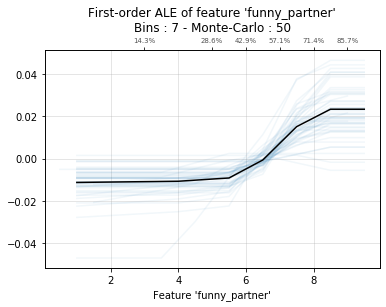

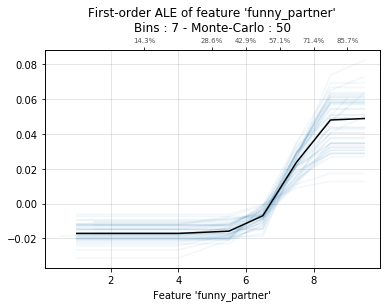

In [11]:
for model in models+bad_models:
    ale_plot(model, X, 'funny_partner', monte_carlo=True)

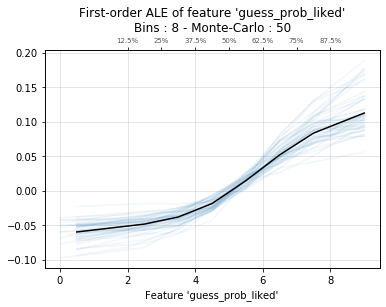

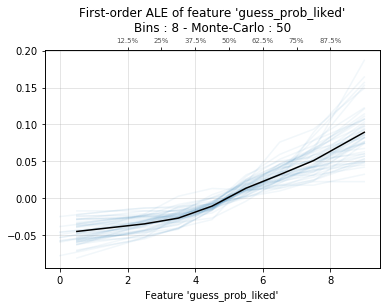

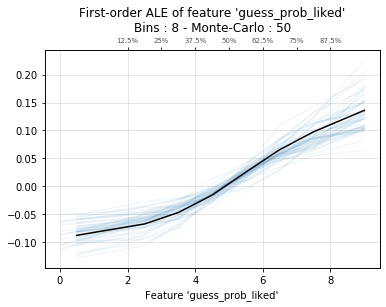

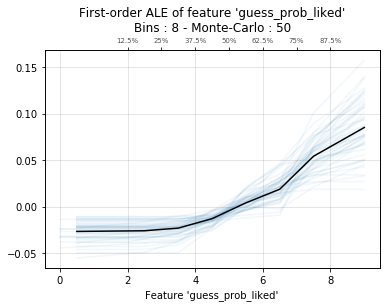

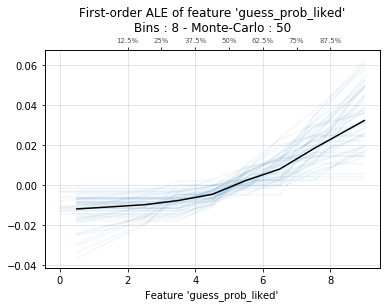

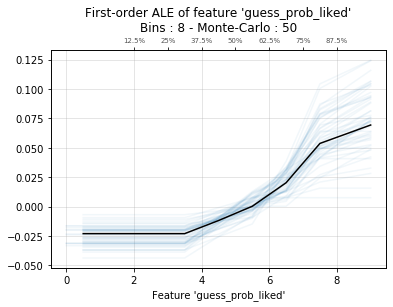

In [12]:
for model in models+bad_models:
    ale_plot(model, X, 'guess_prob_liked', monte_carlo=True)

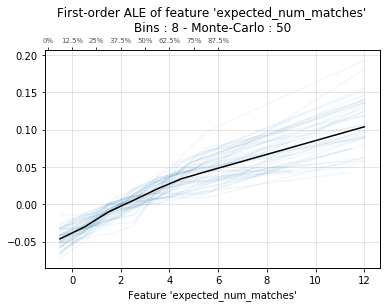

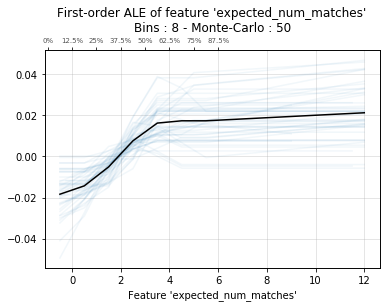

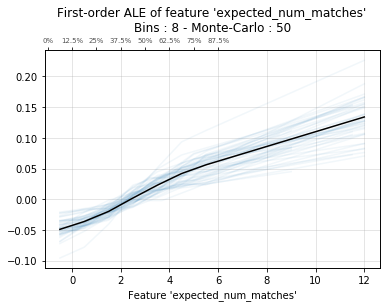

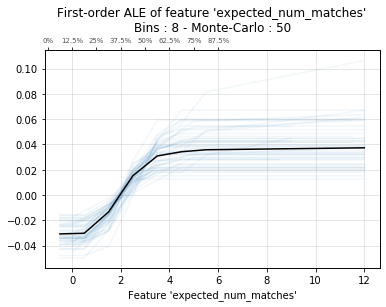

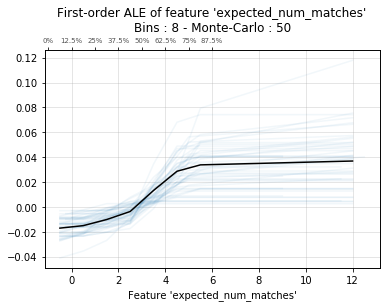

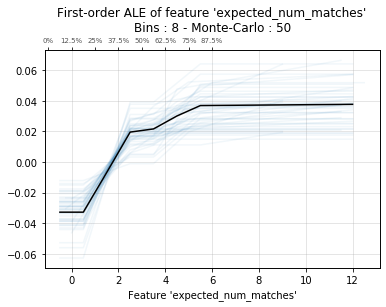

In [13]:
for model in models+bad_models:
    ale_plot(model, X, 'expected_num_matches', monte_carlo=True)

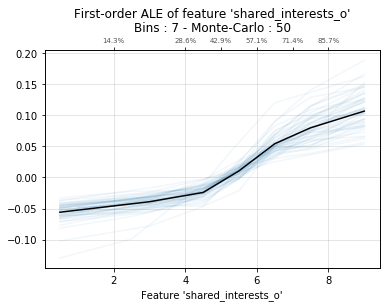

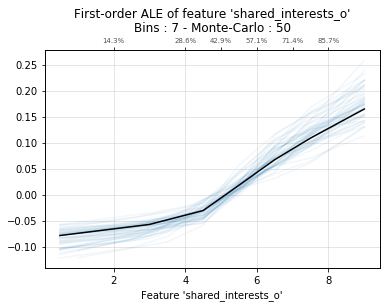

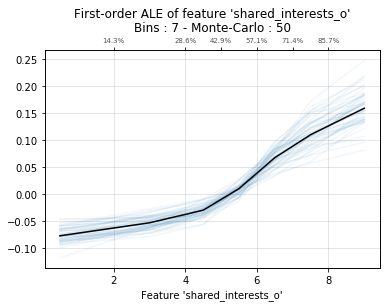

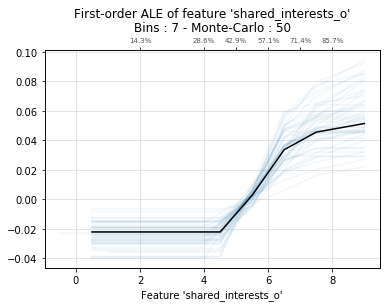

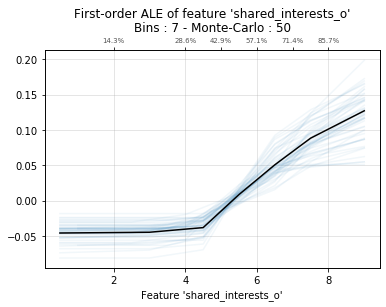

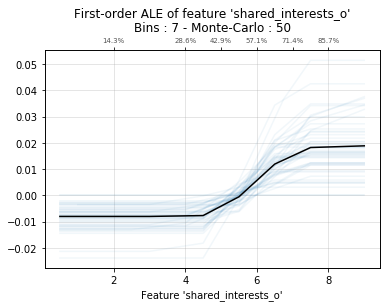

In [14]:
for model in models+bad_models:
    ale_plot(model, X, 'shared_interests_o', monte_carlo=True)

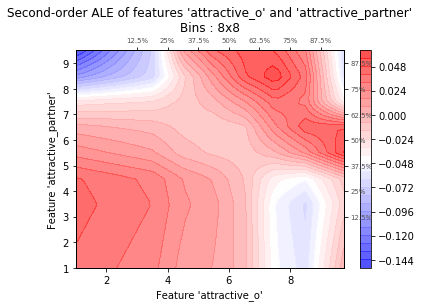

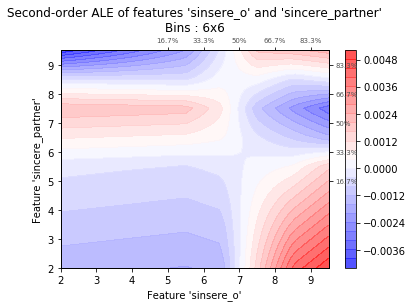

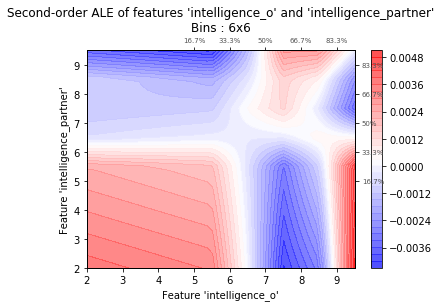

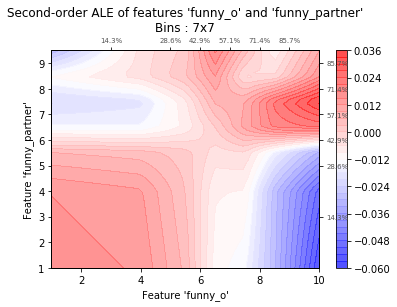

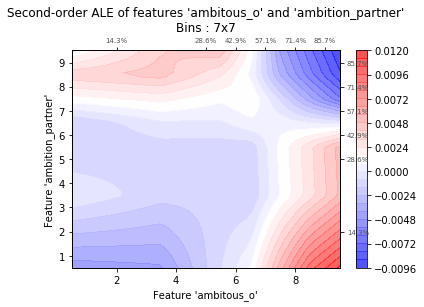

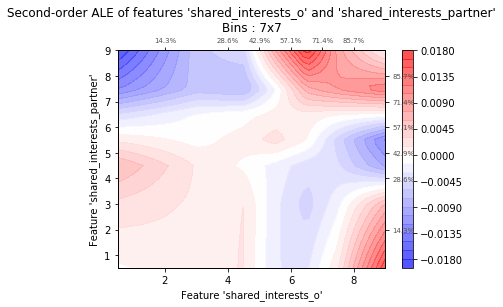

In [15]:
for feature_a, feature_b in zip(['attractive_o', 'sinsere_o','intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o'],
                               ['attractive_partner', 'sincere_partner','intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner']):
    ale_plot(models[0], X, [feature_a, feature_b], monte_carlo=True, bins=10)

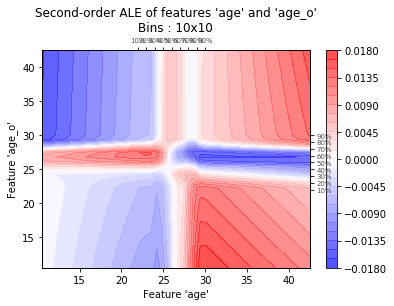

In [16]:
ale_plot(models[0], X, ['age', 'age_o'], monte_carlo=True, bins=10)